# Dimensions of Non Ordinary Experiences: Natural Language Processing of Trascendent Experience Reports

## Senior Thesis

University of Pennsylvania, Fall 2019

**Alex Tianheng Zhao**  
[alextzhao.io](https://alextzhao.io)  
alexzhao@seas.upenn.edu  
School of Engineering and Applied Science, University of Pennsylvania  
The Wharton School, University of Pennsylvania  


**Professor Max Mintz, PhD**  
CIS Senior Thesis Program Coordinator  
University of Pennsylvania  

Updated (Change of Topic): November 17th, 2019  
Proposal Originally Submitted: September 3rd, 2019  
Archive: see [here](https://docs.google.com/document/d/1rwvZtqod3elgEE6wz93fwwqgGn3bhK0DHyhDoCmEIHA/edit?usp=sharing)  

## **Thesis Advisors**
- **Chris Callison-Burch, PhD** { ccb@upenn.edu }  
Department of Computer and Information Science (SEAS), University of Pennsylvania  
 
- **Lyle Ungar, PhD** { ungar@cis.upenn.edu }  
Department of Computer and Information Science; additional appoints in the Departments of Bioengineering (SEAS); Genomics and Computational Biology (Penn Medicine); Operations, Informations, and Decisions (Wharton); Psychology (SAS), University of Pennsylvania  


### **Useful Links:**
- Thesis Related:
    - [Thesis Master Document](https://docs.google.com/document/d/1dk1xXyfHqfdn5Tld-KZu7toiNYQeJHQv7BUlG7uSqP4/edit#)
    - [Thesis Scratch Paper](https://docs.google.com/document/d/1BP5Z2J9tJvRJB5J-hthQIGrdSnD0Bcvctd7kHqbUUKw/edit?usp=sharing)
    - [Thesis Codebase](https://github.com/alextzhao/psychedelicNLP)
- Helpful Tutorials and Tips
    - [Markdown Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#links)
    - [Using R and Python together](https://stackoverflow.com/questions/39008069/r-and-python-in-one-jupyter-notebook); [python, R dataframe interoperability](https://rpy2.github.io/doc/latest/html/pandas.html); [R and python pipelining](https://blog.revolutionanalytics.com/2016/01/pipelining-r-python.html)
    - [Translate dplyr to pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_r.html)
    - [Basic pandas tutorial](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html#min)
    - [Recommended dependencies for pandas](https://pandas.pydata.org/pandas-docs/stable/install.html#install-recommended-dependencies)
    - [Pandas: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html)  


![Pandas Indexing Cheatsheet](./pandas_indexing_cheatsheet.png)


# Part 0: Data Acquisition, Wrangling, and Exploratory Data Analysis (EDA)

In [1]:
# Sets up the ability to use R in a jupyter notebook
# https://stackoverflow.com/questions/39008069/r-and-python-in-one-jupyter-notebook
# To use R, add %%R to the beginning of a cell, before any code and any comments
%load_ext rpy2.ipython

In [2]:
%%R
# Installs the proper R packages
if(!require('pacman')) {
  install.packages('pacman', repos = "http://cran.us.r-project.org")
}
pacman::p_load(dplyr, leaps, car, tidyverse, GGally, reshape2, data.table, ggcorrplot, bestglm, glmnet, mapproj, pROC, data.tale, tm, SnowballC, wordcloud, RColorBrewer, reshape2) 


R[write to console]: Loading required package: pacman



In [3]:
%%R

## Read in trip reports
tripReports <- fread("trips.csv")
tripReports.df <- as.data.frame(tripReports)
# glimpse(tripReports)

nrow(tripReports)


[1] 19924


In [4]:
%%R
# Examine the substances present in the dataset
tripReports %>% select(substance) %>% write.table(file = "substances-all", append=FALSE, col.names = FALSE, row.names = FALSE, sep = "\n")

In [5]:
%%R

## Manipulate the dataframe to have 1 hot encoding for substances
tripReports$substance <- tolower(tripReports$substance)
tripReports <- as.data.frame(tripReports)
substances.of.interest <- c("substance.mushrooms", "substance.lsd", "substance.mescaline", "substance.cannabis", "substance.mdma", "substance.ayahuasca", "substance.nitrous_oxide", "substance.salvia", "substance.methamphetamine", "substance.dmt", "substance.5_meo_dmt", "substance.alcohol", "substance.ketamine", "substance.ibogaine", "substance.pcp", "substance.kava", "substance.kratom", "substance.morning_glory", "substance.syrian_rue", "substance.unknown", "substance.UNK")

for (sub in substances.of.interest) {
  tripReports[sub] = 0
}

### Adding one hot encodings to the substances
tripReports$substance.mushrooms[grepl("mushroom|mushhrooms|mushooms|psilocin|psilocybin|psilocybe", tripReports$substance)] <- 1
tripReports$substance.lsd[grepl("lysergic acid|lsd", tripReports$substance)] <- 1
tripReports$substance.mescaline[grepl("mescaline|peyote", tripReports$substance)] <- 1
tripReports$substance.cannabis[grepl("cannabis|canabis|cannabbis|cannabinoid|cannabus|cannibis|cannibus| thc ", tripReports$substance)] <- 1
tripReports$substance.mdma[grepl("mdma|ecstacy|ecstasy|ectasy|molly", tripReports$substance)] <- 1
tripReports$substance.ayahuasca[grepl("ayahuasca|ayahausca|ayahusca|p. viridis|p.viridis|b.caapi|b. caapi|cappi|viridis", tripReports$substance)] <- 1
tripReports$substance.nitrous_oxide[grepl("nitric|nitrites|nitrogen|nitrous|whippets", tripReports$substance)] <- 1
tripReports$substance.salvia[grepl("salia|saliva|salivia|sally|salva|salvia|salvinorin", tripReports$substance)] <- 1
tripReports$substance.methamphetamine[grepl("met|meth|methampetamine|methamphetamine|speed", tripReports$substance)] <- 1
# dmt
tripReports$substance.dmt[grepl("nn-dmt", tripReports$substance)] <- 1
tripReports$substance.dmt[tripReports$substance == "dmt"] <- 1 # cannot just grep dmt otherwise this will include 5-meo-dmt
#5-meo-dmt
tripReports$substance.5_meo_dmt[grepl("5 meo-dmt|5-meo dmt|5-meo-dmt|5meo-dmt", tripReports$substance)] <- 1
tripReports$substance.alcohol[grepl("alchohol|alcohol", tripReports$substance)] <- 1
tripReports$substance.ketamine[grepl("ketamin|ketamine", tripReports$substance)] <- 1
tripReports$substance.ibogaine[grepl("iboga|ibogaine", tripReports$substance)] <- 1
tripReports$substance.pcp[grepl("pcp", tripReports$substance)] <- 1
tripReports$substance.kava[grepl("kava", tripReports$substance)] <- 1
tripReports$substance.kratom[grepl("kratom", tripReports$substance)] <- 1
tripReports$substance.morning_glory[grepl("glory|glories", tripReports$substance)] <- 1
tripReports$substance.syrian_rue[grepl("syrian rue|rue", tripReports$substance)] <- 1
tripReports$substance.unknown[grepl("unknown|unidentified|unkown", tripReports$substance)] <- 1

glimpse(tripReports)


Observations: 19,924
Variables: 24
$ report                    <chr> "After having had some success with other f…
$ title                     <chr> "Sideways World", "Physical Wellbeing = Cru…
$ substance                 <chr> "salvia divinorum (5x extract)", "mushrooms…
$ substance.mushrooms       <dbl> 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0…
$ substance.lsd             <dbl> 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ substance.mescaline       <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ substance.cannabis        <dbl> 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0…
$ substance.mdma            <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ substance.ayahuasca       <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ substance.nitrous_oxide   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ substance.salvia          <dbl> 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ substance.methamphetamine <dbl> 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0…
$ substance.dmt  

In [6]:
%%R

## Number of reports containing each substance: NOTE: a report might have more than one substance
tripSubstances <- tripReports %>% select(-report, -title, -substance)
tripReportsCount <- data.frame(substance = names(tripSubstances), count = colSums(tripSubstances))
tripReportsCountSorted <- tripReportsCount %>% arrange(desc(count))
tripReportsCountSorted

                   substance count
1         substance.cannabis  3110
2        substance.mushrooms  1686
3           substance.salvia  1556
4             substance.mdma  1188
5              substance.lsd  1131
6  substance.methamphetamine   929
7          substance.alcohol   928
8    substance.morning_glory   427
9    substance.nitrous_oxide   300
10       substance.5_meo_dmt   297
11      substance.syrian_rue   293
12        substance.ketamine   289
13          substance.kratom   207
14       substance.ayahuasca   172
15             substance.dmt   167
16            substance.kava   167
17             substance.pcp    81
18       substance.mescaline    73
19         substance.unknown    47
20        substance.ibogaine    43
21             substance.UNK     0


In [7]:
%%R

## Find reports with only one unique substance

tripReports$substance.unique_label <- "NA"
# glimpse(tripReports)
uniqueSubstanceRows <- tripReports %>% select(-report, -title, -substance, -substance.unique_label) %>% rowSums() == 1

for (row in 1:nrow(tripReports)) {
  # this row contains a unique substance
  if (uniqueSubstanceRows[row]) {
    for (substance in substances.of.interest) {
      if (tripReports[row, substance] == 1) {
        tripReports[row, ]$substance.unique_label<- substance
      } 
    }
  }
}

glimpse(tripReports)



Observations: 19,924
Variables: 25
$ report                    <chr> "After having had some success with other f…
$ title                     <chr> "Sideways World", "Physical Wellbeing = Cru…
$ substance                 <chr> "salvia divinorum (5x extract)", "mushrooms…
$ substance.mushrooms       <dbl> 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0…
$ substance.lsd             <dbl> 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ substance.mescaline       <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ substance.cannabis        <dbl> 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0…
$ substance.mdma            <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ substance.ayahuasca       <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ substance.nitrous_oxide   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ substance.salvia          <dbl> 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ substance.methamphetamine <dbl> 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0…
$ substance.dmt  

In [8]:
%%R

# TEMP, SAVE: Use this code to save the encoded table for future use
save(tripReports, file="tripReportsEncoded.Rda")
write.table(tripReports, file="tripReportsEncodedTable", sep = ";;", row.names = TRUE, col.names = TRUE )
write.csv(tripReports, file="tripReportsEncoded.csv", sep = ",", row.names = TRUE, col.names = TRUE)

From cffi callback <function _processevents at 0x10cb41dd0>:
Traceback (most recent call last):
  File "/Users/alextzhao/opt/anaconda3/lib/python3.7/site-packages/rpy2/rinterface_lib/callbacks.py", line 262, in _processevents
    @ffi_proxy.callback(ffi_proxy._processevents_def,
KeyboardInterrupt


In [9]:
%%R

#### Create a data frame that combines the count for reports containing a substance and reports that are uniquely a single substance
tripReportsUniqueSubstanceCountSorted <- tripReports %>% group_by(substance.unique_label) %>% summarise(count = n()) %>% arrange(desc(count))
# glimpse(tripReportsCountSorted)
colnames(tripReportsUniqueSubstanceCountSorted) = c("substance", "count")
tripReportsUniqueSubstanceCountSorted %>% glimpse()

tripReportsCount_merged <- merge(tripReportsCountSorted, tripReportsUniqueSubstanceCountSorted, by="substance")
colnames(tripReportsCount_merged) = c("substance", "n_includes_substance", "n_single_substance")

Observations: 21
Variables: 2
$ substance <chr> "NA", "substance.cannabis", "substance.salvia", "substance.…
$ count     <int> 11569, 1609, 1270, 1094, 747, 746, 696, 409, 328, 250, 171,…


In [10]:
%%R

# EXPORT: Table of selected substances and their counts
tripReportsCount_merged %>% arrange(desc(n_includes_substance))

                   substance n_includes_substance n_single_substance
1         substance.cannabis                 3110               1609
2        substance.mushrooms                 1686               1094
3           substance.salvia                 1556               1270
4             substance.mdma                 1188                747
5              substance.lsd                 1131                696
6  substance.methamphetamine                  929                746
7          substance.alcohol                  928                409
8    substance.morning_glory                  427                328
9    substance.nitrous_oxide                  300                155
10       substance.5_meo_dmt                  297                250
11      substance.syrian_rue                  293                164
12        substance.ketamine                  289                170
13          substance.kratom                  207                171
14       substance.ayahuasca      

R[write to console]: Using substance as id variables



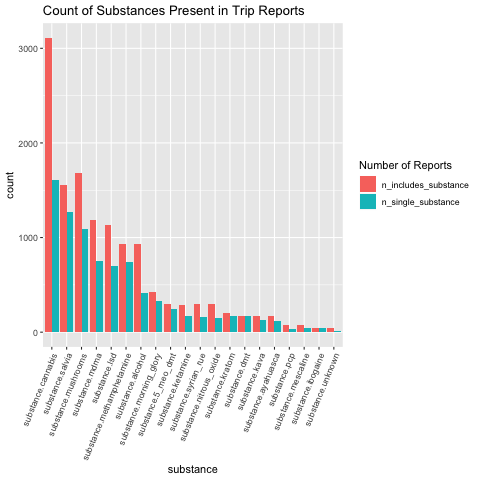

In [11]:
%%R

## This data frame that encodes how many trip reports contains a substance and how many reports are uniquely such a substance'
tripReportsCount_merged.long <- reshape2::melt(tripReportsCount_merged)
# EXPORT: Graph of distribution of substances
tripReportsCount_merged.long %>% ggplot( aes(x = reorder(substance, -value), y = value, fill=variable)) + geom_bar(stat="identity", position = "dodge") + theme(axis.text.x = element_text(angle = 67.5, hjust = 1)) + ggtitle("Count of Substances Present in Trip Reports") + xlab("substance") + ylab("count") + labs(fill = "Number of Reports")

# Part 1: Visualizing Erowid Corpus with Word Clouds

Word Clouds are an intuitively visual way to present vast amounts of textual information, revealing the key themes conveyed in a collection of documents. Prima facie, generating word clouds feel like a simple problem, yet very quickly deeper considerations arise, including (1) using appropriate preprocessing (stop words, stemming, lemmatization), (2) whether to include documents of class $j \neq i$ when constructing a word cloud for documents of class, and (3) how to scale tokens, given (1) and (2). In this section, we explore combinations of different approaches, and conclude that the most suitable approach depends on our philosophy in constructing these word clouds.

## 1.1 Baseline Measures

For our baselines word clouds for documents of class i, we perform basic stopwords removal, with no stemming and lemmatization. We use: 
- Token raw frequency (not considering other classes $\neq i$)
- TF-IDF weighting (considering other classes $j \neq i$)

Note that since each trip report may contain multiple classes, we will include a document that contains k classes in k word clouds.


### Step 0: Getting to know pandas and our dataframe

In [83]:
### Getting to know the dataframe + pandas
# pd.set_option('display.width', 80)
# pd_tripReports.shape
# pd_tripReports.info()
# pd_tripReports.head()
# pd_tripReports.tail()

# Renaming dataframe columns to make it easier to work with
pd_tripReports.columns = pd_tripReports.columns.str.strip().str.lower().str.replace('.', '_')
pd_tripReports.head()

,report,title,substance,substance_mushrooms,substance_lsd,substance_mescaline,substance_cannabis,substance_mdma,substance_ayahuasca,substance_nitrous_oxide,...,substance_ketamine,substance_ibogaine,substance_pcp,substance_kava,substance_kratom,substance_morning_glory,substance_syrian_rue,substance_unknown,substance_unk,substance_unique_label
1,After having had some success with other forms...,Sideways World,salvia divinorum (5x extract),0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,substance.salvia
2,Me and a couple of my buddies decided one nigh...,Physical Wellbeing = Crucial,mushrooms,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,substance.mushrooms
3,My girlfriend and I had been saving the methyl...,The Artful Dodger,methylone,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,substance.methamphetamine
4,I just want to warn anybody taking Lithium (or...,Seizure Inducing Combo,lsd & lithium,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,substance.lsd
5,I have had several attempts before this to bre...,Enlightenment Through a Chemical Catalyst,5-meo-dmt,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,substance.5_meo_dmt


### Step 1: Retrieve the reports for different substances

In [12]:
%%R -o tripReports -o tripReports.long
# ^ export tripReports and tripReports.long for use in python environment
# https://stackoverflow.com/questions/55841165/share-variables-between-r-and-python-in-jupyternotebook

### create long data format, using report, title, substance, substance.unique_label as id variables
# glimpse(tripReports)
tripReports.long <- reshape2::melt(tripReports)

### validate the long data format
tripReports.long %>% select(-report) %>% group_by(title) %>% summarize(n()) %>% head()
# glimpse(tripReports.long)
# glimpse(tripReports)


R[write to console]: Using report, title, substance, substance.unique_label as id variables



# A tibble: 6 x 2
  title                           `n()`
  <chr>                           <int>
1 ::: The City of Light :::          21
2 ... Meh                            21
3 ...But I Did Everything Right!     21
4 ...Until the Crystal Cracked!      21
5 ...When I'm Closing in on Death    21
6 .3 PPM of Our Air                  21


KeyboardInterrupt: 

In [108]:
# Use the wordcloud package to generate baseline wordclouds
# https://github.com/amueller/word_cloud
# https://www.datacamp.com/community/tutorials/wordcloud-python

import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
from wordcloud import STOPWORDS as wordcloud_STOPWORDS
import nltk
from nltk.corpus import stopwords as nltk_stopwords
nltk.download('stopwords')

import matplotlib.pyplot as plt

# # utilities to interoperate between R and pandas data frames
# # see https://rpy2.github.io/doc/latest/html/pandas.html
# import rpy2.robjects as ro
# from rpy2.robjects.packages import importr
# from rpy2.robjects import pandas2ri
# from rpy2.robjects.conversion import localconverter

# # convert the R data frame to a pandas dataframe
# with localconverter(ro.default_converter + pandas2ri.converter):
#   pd_tripReports = ro.conversion.rpy2py(tripReports)

# NOTE: We can just read directly from the csv file that we saved earlier
pd_tripReports = pd.read_csv("tripReportsEncoded.csv", index_col=0)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alextzhao/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [105]:
## Prepare a few substances lists for use

# a list of all the substances we want word clouds for
substances_all_list = pd_tripReports.loc[:, 'substance_mushrooms':'substance_syrian_rue'].columns.tolist()
# [ 'mushrooms', 'lsd', 'cannabis', ... etc] for use as stopwords
substances_all_plainstring_list = [substance.replace("substance_", "") for substance in substances_all_list]

# TODO: Prepare regexes to match with all the observed spellings of different substances

In [106]:
#### Get the text for interested substances
# a dictionary mapping {substance_<name> : text}
reports_text = {}
# Concatenate with " " by default, TODO: Can specify separator as such: str.cat(sep="...")
for substance in substances_all_list:
    reports_text[substance] = pd_tripReports.query("{} == 1".format(substance))["report"].str.cat().lower()

### Step 2: Preprossing, including stopwords analysis, tokenization, stemming, lemmatization

Text preprossing procedures draws inspiration from [here](https://towardsdatascience.com/creating-word-clouds-with-python-f2077c8de5cc) and [A Practitioner's Guide to Natural Language Processing (Part I) — Processing & Understanding Text](https://towardsdatascience.com/a-practitioners-guide-to-natural-language-processing-part-i-processing-understanding-text-9f4abfd13e72), as well as Professor `Chris Callison-Burch's` [Computational Liguistics Class](http://computational-linguistics-class.org/)

#### >> Prepare Stopwords

We use `nltk` and `wordcloud` stopwords as a baseline, and add all alternative spellings of drugs observed from EDA to our stopwords list; Note that the latter is an option, concious design decision: we can leave the drug names be (in which case they would show up disproportionately in the word clouds), or we can remove all drug names from the reports and focus on non-drug words that correlate to each substance

In [115]:
# Retrieve all alternative spellings for substances
with open('substances_unique') as f:
    substances_all_alternative_spellings = f.readlines()
substances_all_alternative_spellings = [spelling.strip().replace("'", "") for spelling in substances_all_alternative_spellings]
substances_all_alternative_spellings[:30]

# prepare stopwords
stopword_list = []
stopwords_nltk = nltk_stopwords.words('english')
stopwords_wordcloud = list(wordcloud_STOPWORDS)
stopword_list.extend(stopwords_nltk + stopwords_wordcloud + substances_all_alternative_spellings)

# How many stopwords do we have?
len(stopword_list)

3154

#### >> Cleaning and Tokenizing the Text

To improve performance of wordclouds and subsequent processing of the reports, we use `nltk` to tokenize the text; Note that other tokenization methods may be tested for performance comparison


In [ ]:
# OPTIONAL
# Remove accented characters and normalise using the unicodedata library
# from https://towardsdatascience.com/creating-word-clouds-with-python-f2077c8de5cc\
# TODO
unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

In [117]:
# NOTE: Long Run Time

# Tokenize the text
reports_text_tokenized = {}

# reports_text is {substance: text} mapping
# NOTE: This code takes an extremely long time to run
for substance in reports_text:
    substance_text = reports_text[substance]
    tokens = nltk.word_tokenize(substance_text)    
    tokens = [token.strip().lower() for token in tokens]
    substance_tokenized_text = ' '.join([token for token in tokens if token not in stopword_list])
    
    reports_text_tokenized[substance] = substance_tokenized_text


Because the tokenization and removal of stopwords takes a substantial amount of time to run, we store a serialized version of the object so we may retrive it later at a substantially faster rate; see [pickle tutorial](https://www.journaldev.com/15638/python-pickle-example)

In [119]:
# OPTIONAL
## Use this cell as a template to save and load large data files; current code saves and loads `reports_text_tokenized`

import pickle

### Stores the tokenized reports:
with open('reports_tokenized_map', 'wb') as out_file:
    pickle.dump(reports_text_tokenized, out_file)
    
### Loads the tokenized reports:
with open('reports_tokenized_map', 'rb') as in_file:
    reports_text_tokenized = pickle.load(in_file)

#### >> Stemming and Lemmatizing the text

For our baseline results, stemming and lemmatizing is optional; nevertheless, we include the procedures here in case the reader would like to explore

In [102]:
# OPTIONAL
# Lammatization
# TODO

['an upper',
 'base',
 'bath salt',
 'dream herbal incense)',
 'ecstasy (unknown',
 'indian leaf',
 'london underground dream)',
 'magic silver',
 'sensory deprivation',
 'white rock opium',
 '(15x extract)',
 '(2c-t-7',
 '(amt + mdma)',
 '(amt + methamphetamine)',
 '(hydrocodone',
 '(methyl',
 '(quetiapine) seroquel',
 '1',
 '1 soma',
 '1-4 butanediol',
 '10x',
 '10x extract)',
 '10x extracts)',
 '15x extracts)',
 '19-norandrostenedione (nor-19)',
 '2-aminoindan',
 '2-aminoindan (im)',
 '2-c-t-2',
 '2-cb',
 '2-cd']

### Step 3: Generating wordclouds based on word frequency

Note: Using the `wordcloud` package, we are making numerous assumptions, including:
- Word scaling based on `frequency` only
-  of words: the `wordcloud` package has a `relative_scaling` attribute, which specifies the importance of relative word frequencies for font-size. If `relative_scaling = 0`, the only word-ranks are considered; `relative_scaling=1` means words size is directly proportional to their frequency; Default of `relative_scaling = 0.5` considers both word frequency and word rank, and is used in our analysis. Insight retrieved from `wordcloud` [documentation](http://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud) and from [this tutorial](https://www.datacamp.com/community/tutorials/wordcloud-python)

Now plotting wordclouds for 5 substances...


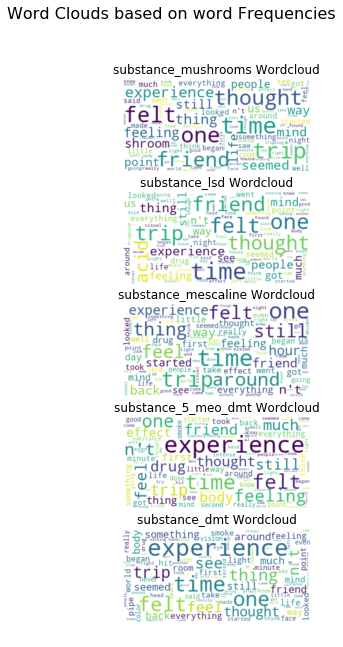

In [135]:
#### Create Wordclouds
# a list of the "classical psychedelics"
substances_psychedelics_list = ["substance_mushrooms", "substance_lsd", "substance_mescaline", "substance_5_meo_dmt", "substance_dmt"]


# NOTE: change this line of code to change which substances to plot
substances_to_plot = substances_psychedelics_list
num_plots = len(substances_to_plot)
print("Now plotting wordclouds for {} substances...".format(num_plots))

# creating subplots: https://stackoverflow.com/questions/25239933/how-to-add-title-to-subplots-in-matplotlib
# changing figure size: https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
fig = plt.figure(figsize=(50, 10))
fig.suptitle("Word Clouds based on word Frequencies", fontsize=16)

for index, substance in enumerate(substances_to_plot):
    wordcloud = WordCloud(stopwords=stopword_list, max_font_size=50, max_words=100, background_color="white").generate(reports_text_tokenized[substance])
    ax = plt.subplot(num_plots, 1, index+1) # note here for subplots index must be [1, num_plots]
    ax.set_title("{} Wordcloud".format(substance))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")

plt.savefig('wordclouds_naive_psychedelics.png')
plt.show()
    


# wordcloud = WordCloud(stopwords=stopwords_all, max_font_size=50, max_words=100, background_color="white").generate(reports_text_tokenized["substance_mushrooms"])
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()

#### Step 4: (For Fun) Creating custom word cloud masks

To make the wordclouds more interesting, we can add custom image masks to the wordclouds, as inspired by [this article](https://towardsdatascience.com/creating-word-clouds-with-python-f2077c8de5cc), [this tutorial](https://www.datacamp.com/community/tutorials/wordcloud-python), and `wordcloud` package [documentation](http://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html)

In [ ]:
char_mask = np.array(Image.open("images/image.jpeg"))
image_colors = ImageColorGenerator(char_mask)



# Appendix: archived code, explanations, and miscellaneous musings

In [27]:
# Explore the dataset trips.csv
import csv
printed = 0
with open('trips.csv') as f:
  csv_reader = csv.reader(f)
  for line in csv_reader:
    if printed < 2:
        print(line)
        printed += 1
    else:
        break

['report', 'title', 'substance']
["After having had some success with other forms of legal highs, I decided to experiment with salvia.  I had heard it was an intense but short acting psychedelic, which intrigued me.  Although I have loved psychedelics since I first discovered them eight years ago, I dont use them that often in part because of the time involved in tripping and analyzing the experience.  That said I have used psychedelics somewhere around three dozen times in my life.  My favorite method of tripping is LSD, but I have also used mushrooms, morning glory and baby woodrose seeds.  I have also used a variety of other drugs, including stimulants, depressants, empathogens, and deleriants.\n\n\n\nI ordered salvia online, choosing a 5x extract.  When the package arrived my husband wanted to try it immediately.  I prefer to prepare more for trips but knowing the effects werent supposed to last very long I said why not?  My husband, who uses psychedelics rarely now but used them a

## Issues Encoutered, and solutions

- Python not working:  
`brew install python`  
`brew update python`  
- Need to update xcode command line tools after every major / minor os upgrade: `xcode-select --install`; see [here](https://stackoverflow.com/questions/52522565/git-is-not-working-after-macos-update-xcrun-error-invalid-active-developer-pa)

- Issues with installing [wordcloud](https://www.datacamp.com/community/tutorials/wordcloud-python)
- TODO: Write an article explaining managing python versions on Mac, using both `Anacoda` and `pip`
- Cannot do `brew link <packageName>`; see [here](https://github.com/caskformula/homebrew-caskformula/issues/10)
- Adding `autocompletion` to jupyter notebook with [this tool](https://github.com/ipython-contrib/jupyter_contrib_nbextensions)
